# Homework 5

In this homework you will be working on defining a useful reusable function to load and prepare data, as well as looking in detail at some of the preprocessing steps presented in lecture 6, namely temporal filtering, spatial filtering, and temporal normalization.

In [1]:
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.
from client.api.notebook import Notebook
ok = Notebook('hw5.ok')
#_ = ok.auth(inline=True)

Assignment: HW 5
OK, version v1.12.5



In [2]:
import numpy as np
import nibabel
import cortex
import matplotlib.pyplot as plt
%matplotlib inline

**1. A function for loading and optionally masking fMRI scans**

**(a)** [0.5pts] Write a function called `load_file_very_simple`, which takes as its argument a file name of a nifti file. Call this argument `filename`. The function should load the data contained in the file and return a transposed version.

In [3]:
def load_file_very_simple(filename):
    img = nibabel.load(filename)
    data = img.get_data()
    return data.T

In [4]:
# test to check whether the name `load_file_very_simple` exists
ok.grade("q5_1a")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 1}

In [5]:
## test to check results
# ok.grade("q5_1a_full")

**(b)** [0.5pts] Now write another function called `load_file_simple`, which takes a `filename` and the optional argument `mask` with default value `None`. `load_file_simple` should load and transpose the data just like `load_file_very_simple` does. **After the transposing**, it should check whether a mask has been provided (i.e. `if mask is not None:`), and if there is a mask it should use it to reduce the number of voxels. So if there is no mask it will return a 4-D scan array, but if there is a mask it will return a 2-D collection of voxel time series containing the voxels selected by the mask.

In [6]:
def load_file_simple(filename, mask=None):
    dataT = load_file_very_simple(filename)
    if mask is not None:
        dataT = dataT[:, mask]
    return dataT

In [7]:
# test to check whether the name `load_file_simple` exists
ok.grade("q5_1b")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 1}

In [8]:
## test to check results
# ok.grade("q5_1b_full")

**(c)** [0.5pts] Load the file located at `/data/cogneuro/fMRI/categories/s01_categories_01.nii.gz` using `load_file_very_simple` and store it into `data1`. Load the same file using `load_file_simple` and store the result in `data2`. Compare the two using `np.allclose` by passing the 2 arrays as the first 2 arguments of the function. This function is used when comparing `float`s because they have many decimal points, and sometimes two values that really should be the same appear different due to rounding errors. `np.allclose` will say 2 arrays of floats are the same if all the numbers are within a certain distance of each other. Finally, store the output from `np.allclose` in `same1` and print it.

In [9]:
data1 = load_file_very_simple("/data/cogneuro/fMRI/categories/s01_categories_01.nii.gz")
data2 = load_file_simple("/data/cogneuro/fMRI/categories/s01_categories_01.nii.gz")
same1 = np.allclose(data1, data2)
print(same1)

True


In [10]:
# test to check whether the names exist
ok.grade("q5_1c")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 3}

In [11]:
## test to check results
# ok.grade("q5_1c_full")

**(d)** [1pts] Use `cortex.db.get_mask` to obtain a cortical mask for the subject `'s01'` and transform `'catloc'`. Call it `mask`. Use it to mask out the 3 spatial axes (Z,Y,X) from the 4-D scan array called `data1`. Call the result `data1_masked`. Next, use `load_file_simple` to load the file from **(c)** but by giving the mask as an argument to the function. Store the result in `data2_masked`. Compare `data1_masked` and `data2_masked` using `np.allclose` and store the result in `same2`. Print `same2`.

In [12]:
mask = cortex.db.get_mask('s01', 'catloc', 'cortical')
data1_masked = data1[:, mask]
data2_masked = load_file_simple("/data/cogneuro/fMRI/categories/s01_categories_01.nii.gz", mask=mask)
same2 = np.allclose(data1_masked, data2_masked)
print(same2)

True


In [13]:
# test to check whether the names exist
ok.grade("q5_1d")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 4}

In [14]:
## test to check results
# ok.grade("q5_1d_full")

**2. A closer look at temporal filtering (high-pass)**
In this exercise you will look in detail at which frequencies are affected by a high-pass filter. For this, you will create several time series of different pure waves of varying frequencies using the `create_sine` function from the lecture.

In [15]:
def create_sine(sinefreq):
    fs = 200 # 200 frames per second
    duration = 2 #seconds
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    return y_sine

**(a)** [0.5pts] Create 4 simple waves of frequency `2Hz, 4Hz, 8Hz, 16Hz`. Name them `w2, w4, w8, w16`. Plot the 4 simple waves on a single line plot in a figure named `fig_simple_waves` of size `(20, 3)` and create a legend that identifies each wave.

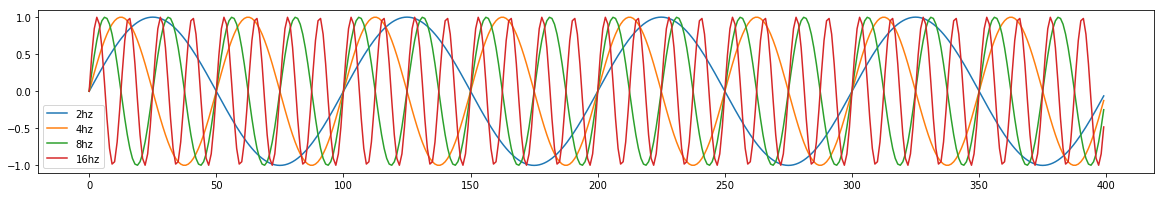

In [16]:
w2 = create_sine(2)
w4 = create_sine(4)
w8 = create_sine(8)
w16 = create_sine(16)

fig_simple_waves = plt.figure(figsize=(20, 3))
plt.plot(w2, label='2hz')
plt.plot(w4, label='4hz')
plt.plot(w8, label='8hz')
plt.plot(w16, label='16hz')
_ = plt.legend()

In [17]:
# test to check whether the names exist
ok.grade("q5_2a")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 5
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 5}

In [18]:
## test to check results
# ok.grade("q5_2a_full")

**(b)** [0.5pts] Add the 4 simple waves from part **a** together to create a complex wave. Store this complex wave in the name `cw`. Plot the complex wave into a figure named `fig_complex_wave`, of size `(20, 3)`

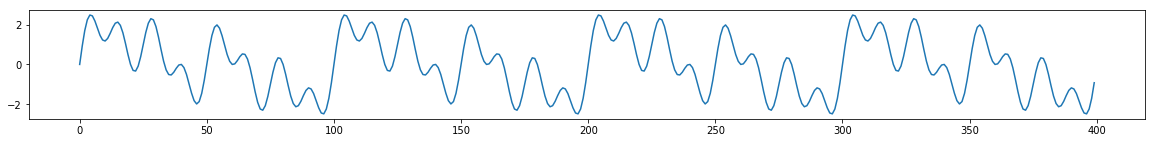

In [19]:
cw = w2  + w4  + w8  + w16 

fig_complex_wave = plt.figure(figsize=(20, 2))
_ = plt.plot(cw)

In [20]:
# test to check whether the names exist
ok.grade("q5_2b")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

In [21]:
## test to check results
# ok.grade("q5_2b_full")

**(c)** [0.5pts] Using the `highpass_filter` function from the lecture (included below), remove the simple wave with the lowest frequency from the complex wave and store the result in `cw_remove_lowest_one`. Then plot the resulting complex wave in a figure named `fig_cw_removed_lowest_one` of size `(20, 3)`. Choose the cutoff value for the highpass filter to lie half way between the frequency you want to remove and the first frequency you want to keep.

In [22]:
from scipy import signal
def highpass_filter(data, cutoff, order=5):
    fs = 200 # 200 frames per second
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    y = signal.filtfilt(b, a, data)
    return y

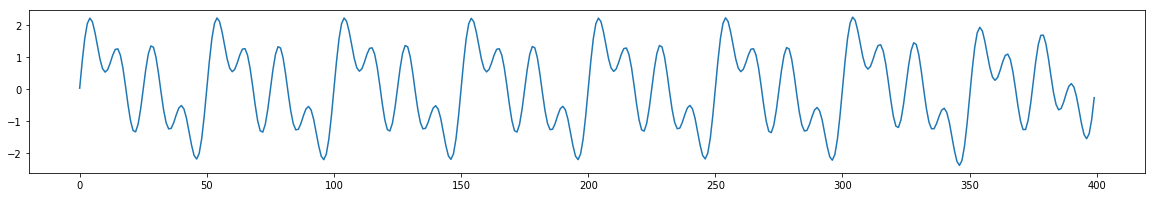

In [23]:
cw_remove_lowest_one = highpass_filter(cw, cutoff=3)
fig_cw_remove_lowest_one = plt.figure(figsize=(20, 3))
_ = plt.plot(cw_remove_lowest_one)

In [24]:
# test to check whether the names exist
ok.grade("q5_2c")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

In [25]:
## test to check results
# ok.grade("q5_2c_full")

**(d)** [0.5pts] Now remove the simple waves with the two lowest frequencies from the original complex wave and store the result in `cw_remove_lowest_two`. Plot `cw_remove_lowest_two` in a figure named `fig_cw_removed_lowest_two` of size `(20, 3)`. Again, choose the cutoff value for the highpass filter to lie half way between the highest frequency you want to remove and the first frequency you want to keep.

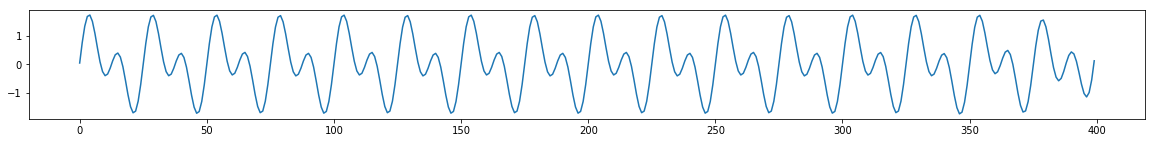

In [26]:
cw_remove_lowest_two = highpass_filter(cw, cutoff=6)
fig_cw_remove_lowest_two = plt.figure(figsize=(20, 2))
_ = plt.plot(cw_remove_lowest_two)

In [27]:
# test to check whether the names exist
ok.grade("q5_2d")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

In [28]:
## test to check results
# ok.grade("q5_2d_full")

**(e)** [0.5pts] Finally, remove the simple waves with the three lowest frequencies from the original complex wave and store the result in `cw_remove_lowest_three`. Plot the resulting wave in a figure named `fig_cw_removed_lowest_three` of size `(20, 2)`.  Also plot the original 16hz simple wave (`w16`) on the same plot. They should look very similar since you've removed the other 3 simple waves from the complex wave. Again, choose the cutoff to lie half way between the highest frequency you want to remove and the first frequency you want to keep.

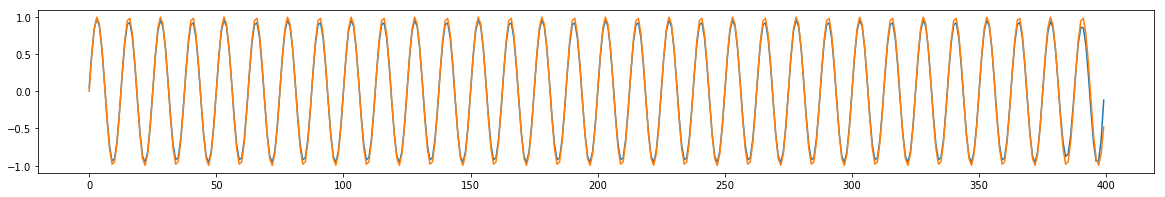

In [29]:
cw_remove_lowest_three = highpass_filter(cw, cutoff=12)
fig_cw_remove_lowest_three = plt.figure(figsize=(20, 3))
plt.plot(cw_remove_lowest_three)
_ = plt.plot(w16)

In [30]:
# test to check whether the names exist
ok.grade("q5_2e")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

In [31]:
## test to check results
# ok.grade("q5_2e_full")

**3. Investigating spatial filtering**

In this exercise, we will take a closer look at the effects of spatial filtering. We will take an axial slice, add noise, and then perform smoothing.

**(a)** [1.5pts] In exercise 1, you loaded a 4-D scan array into `data1`. Select the first volume from `data1` and call it `volume`. Select the axial slice with index `15` and call it `axial_slice`. We will be working with this slice.

Compute the standard deviation (across all axes - output should be one number) of the `axial_slice` using `np.std`. This gives us a rough estimate of the "size of the signal", which will help us scale the noise we want to add. Call this number `signal_size`. Now set the name `noise_ratio` to `0.5` - we would like to corrupt the axial slice with noise that is half the size of the signal.

Using `np.random.randn`, create a 2-D slice array of noise that is the same shape as `axial_slice` (**Hint**: Store the components of `axial_slice.shape` in `hieght` and `width` and use those specify the noise shape.). Call it `noise`. Multiply `noise` by `signal_size` and by `noise_ratio` and store it into `noise_slice`. Then and add `noise_slice` to `axial_slice` and store the result in `noisy_axial_slice`. 

Create a figure named `fig_noisy_slice` of size `(10, 5)`. Using `plt.subplot`, plot `axial_slice` on the left, and `noisy_axial_slice` on the right of the figure.

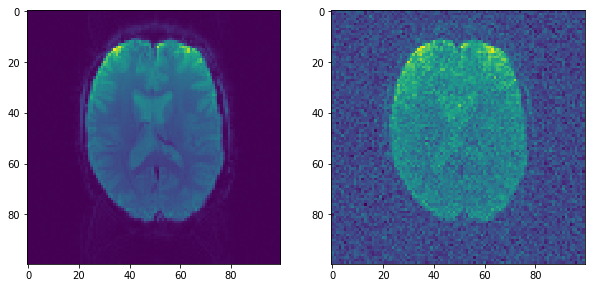

In [32]:
volume = data1[0]
axial_slice = volume[15]
signal_size = np.std(axial_slice)
noise_ratio = 0.5
noise = np.random.randn(*axial_slice.shape)
noisy_axial_slice = axial_slice + noise_ratio * signal_size * noise
fig_noisy_slice = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(axial_slice)
plt.subplot(1, 2, 2)
_ = plt.imshow(noisy_axial_slice)

In [33]:
# test to check whether the names exist
ok.grade("q5_3a")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 7
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 7}

In [34]:
## test to check results
# ok.grade("q5_3a_full")

**(b)** [1pt] Write a function called `make_slice_noisy` that takes two arguments: the 2-D slice array to make noisy call `input_slice`, and the ratio of noise to the standard deviation called `noise_ratio`. `make_slice_noisy` should performs the steps above to add noise to the slice and return the noisy slice. Make absolutely sure that you add noise to the name `input_slice` in the body of your function, wherever you used `axial_slice` before. 

In [35]:
def make_slice_noisy(input_slice, noise_ratio):
    signal_size = np.std(input_slice)
    noise = np.random.randn(*input_slice.shape)
    noisy_slice = input_slice + noise_ratio * signal_size * noise
    return noisy_slice

In [36]:
# test to check whether the names exist
ok.grade("q5_3b")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 1}

In [37]:
## test to check results
# ok.grade("q5_3b_full")

**(c)** [1pts] Crop the `axial_slice` by 10 pixels on all four sides and call the output `cropped_axial_slice` (We are cropping the image in order to test whether your `make_slice_noisy` function actually uses the input). 

Now create 5 new slices that have varying levels of noise added to them. To do this, use `make_slice_noisy` 5 times on the cropped image called `cropped_axial_slice`, using one of the 5 following noise ratios each time `0.0, 0.2, 0.4, 0.6, 1.2`. Call the resulting noisy slices `noisy_axial_slice_0` - `noisy_axial_slice_4`. 

Plot the 5 noisey slices in a single row next to each other in a figure called `fig_noisy_images` of size (20, 4).

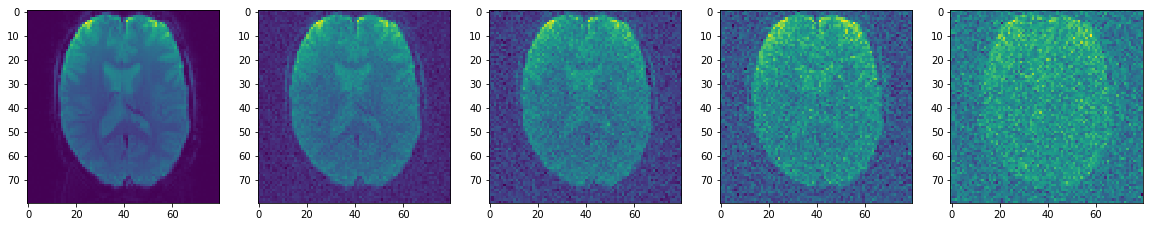

In [38]:
cropped_axial_slice = axial_slice[10:-10, 10:-10]
noisy_axial_slice_0 = make_slice_noisy(cropped_axial_slice, 0.0)
noisy_axial_slice_1 = make_slice_noisy(cropped_axial_slice, .2)
noisy_axial_slice_2 = make_slice_noisy(cropped_axial_slice, .4)
noisy_axial_slice_3 = make_slice_noisy(cropped_axial_slice, .6)
noisy_axial_slice_4 = make_slice_noisy(cropped_axial_slice, 1.2)
fig_noisy_images = plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.imshow(noisy_axial_slice_0)
plt.subplot(1, 5, 2)
plt.imshow(noisy_axial_slice_1)
plt.subplot(1, 5, 3)
plt.imshow(noisy_axial_slice_2)
plt.subplot(1, 5, 4)
plt.imshow(noisy_axial_slice_3)
plt.subplot(1, 5, 5)
plt.imshow(noisy_axial_slice_4)

In [39]:
# test to check whether the names exist
ok.grade("q5_3c")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 7
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 7}

In [40]:
## test to check results
# ok.grade("q5_3c_full")

**(d)** [1pt] Now we are going to smooth each of these slices with three different smoothing sizes: `0.0, 1.0, 4.0`. Use `scipy.ndimage.gaussian_filter` to do this (see the lecture for tips on how to do this). Store the outputs in `noisy_axial_slice_X_smoothed_Y` where X goes from 0 to 4 as before, and Y goes from 0 to 2. So if you smooth `noisy_axial_slice_1` with the filter size `0.0`, then you store the output in `noisy_axial_slice_1_smoothed_0`. For a smoothing with `4.0`, the output should be stored in `noisy_axial_slice_1_smoothed_2`.

In [41]:
from scipy.ndimage import gaussian_filter

In [42]:
noisy_axial_slice_0_smoothed_0 = gaussian_filter(noisy_axial_slice_0, 0.)
noisy_axial_slice_0_smoothed_1 = gaussian_filter(noisy_axial_slice_0, 1.)
noisy_axial_slice_0_smoothed_2 = gaussian_filter(noisy_axial_slice_0, 4.)

noisy_axial_slice_1_smoothed_0 = gaussian_filter(noisy_axial_slice_1, 0.)
noisy_axial_slice_1_smoothed_1 = gaussian_filter(noisy_axial_slice_1, 1.)
noisy_axial_slice_1_smoothed_2 = gaussian_filter(noisy_axial_slice_1, 4.)

noisy_axial_slice_2_smoothed_0 = gaussian_filter(noisy_axial_slice_2, 0.)
noisy_axial_slice_2_smoothed_1 = gaussian_filter(noisy_axial_slice_2, 1.)
noisy_axial_slice_2_smoothed_2 = gaussian_filter(noisy_axial_slice_2, 4.)

noisy_axial_slice_3_smoothed_0 = gaussian_filter(noisy_axial_slice_3, 0.)
noisy_axial_slice_3_smoothed_1 = gaussian_filter(noisy_axial_slice_3, 1.)
noisy_axial_slice_3_smoothed_2 = gaussian_filter(noisy_axial_slice_3, 4.)

noisy_axial_slice_4_smoothed_0 = gaussian_filter(noisy_axial_slice_4, 0.)
noisy_axial_slice_4_smoothed_1 = gaussian_filter(noisy_axial_slice_4, 1.)
noisy_axial_slice_4_smoothed_2 = gaussian_filter(noisy_axial_slice_4, 4.)


In [43]:
# test to check whether the names exist
ok.grade("q5_3d")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 15
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 15}

In [44]:
## test to check results
# ok.grade("q5_3d_full")

**(e)** [0.5pts] Plot all of these in three rows of five images in a figure named `fig_noisy_smoothed` of size (15, 9). The idea is to plot `noisy_axial_slice_0_smoothed_0` on the top left, `noisy_axial_slice_4_smoothed_0` on the top right (5th position), `noisy_axial_slice_0_smoothed_2` on the bottom left, and `noisy_axial_slice_4_smoothed_2` on the bottom right. (First index, X, goes from left to right, second index, Y, goes from top to bottom).
This should give you a total of 15 plots in that figure - 3 rows of 5 plots. The rows correspond to a smoothing level, and the columns correspond to a noise level.

See how the lowest row, smoothing level 4.0, removes pretty much all the noise, but also makes the image look very blurry. The first row is unsmoothed (smoothing level 0.0), and shows you what noisy images look like. In the second row, with a little smoothing, you can see, compared to the images in the first row, that some noise is removed, but that the result is also a little blurry.

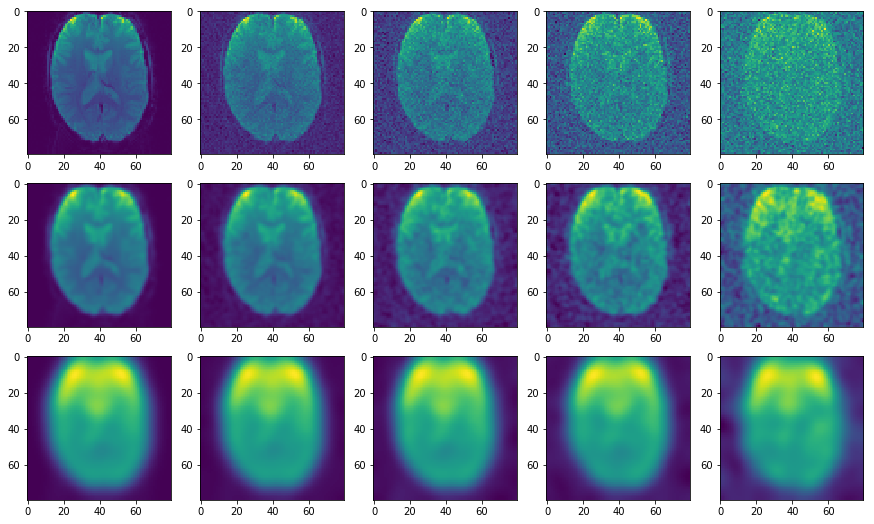

In [45]:
fig_noisy_smoothed = plt.figure(figsize=(15, 9))
plt.subplot(3, 5, 1)
plt.imshow(noisy_axial_slice_0_smoothed_0)
plt.subplot(3, 5, 2)
plt.imshow(noisy_axial_slice_1_smoothed_0)
plt.subplot(3, 5, 3)
plt.imshow(noisy_axial_slice_2_smoothed_0)
plt.subplot(3, 5, 4)
plt.imshow(noisy_axial_slice_3_smoothed_0)
plt.subplot(3, 5, 5)
plt.imshow(noisy_axial_slice_4_smoothed_0)

plt.subplot(3, 5, 6)
plt.imshow(noisy_axial_slice_0_smoothed_1)
plt.subplot(3, 5, 7)
plt.imshow(noisy_axial_slice_1_smoothed_1)
plt.subplot(3, 5, 8)
plt.imshow(noisy_axial_slice_2_smoothed_1)
plt.subplot(3, 5, 9)
plt.imshow(noisy_axial_slice_3_smoothed_1)
plt.subplot(3, 5, 10)
plt.imshow(noisy_axial_slice_4_smoothed_1)

plt.subplot(3, 5, 11)
plt.imshow(noisy_axial_slice_0_smoothed_2)
plt.subplot(3, 5, 12)
plt.imshow(noisy_axial_slice_1_smoothed_2)
plt.subplot(3, 5, 13)
plt.imshow(noisy_axial_slice_2_smoothed_2)
plt.subplot(3, 5, 14)
plt.imshow(noisy_axial_slice_3_smoothed_2)
plt.subplot(3, 5, 15)
plt.imshow(noisy_axial_slice_4_smoothed_2)



In [46]:
# test to check whether the names exist
ok.grade("q5_3e")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 1}

In [47]:
## test to check results
# ok.grade("q5_3e_full")

In [ ]:
# Don't forget to submit!
_ = ok.submit()

<IPython.core.display.Javascript object>